In [32]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [33]:
# import package
import yfinance as yf

# set start and end dates 
start_date = datetime.datetime(2018, 2, 1) 
interval = '1d'

# extract the closing price data
# Fetch data from Yahoo Finance
ticker = "TSM"
stock_data = yf.download(ticker, interval=interval, start=start_date)
stock_data.head()['Close'] 

[*********************100%%**********************]  1 of 1 completed


Date
2018-02-01    45.450001
2018-02-02    44.509998
2018-02-05    42.950001
2018-02-06    43.590000
2018-02-07    41.880001
Name: Close, dtype: float64

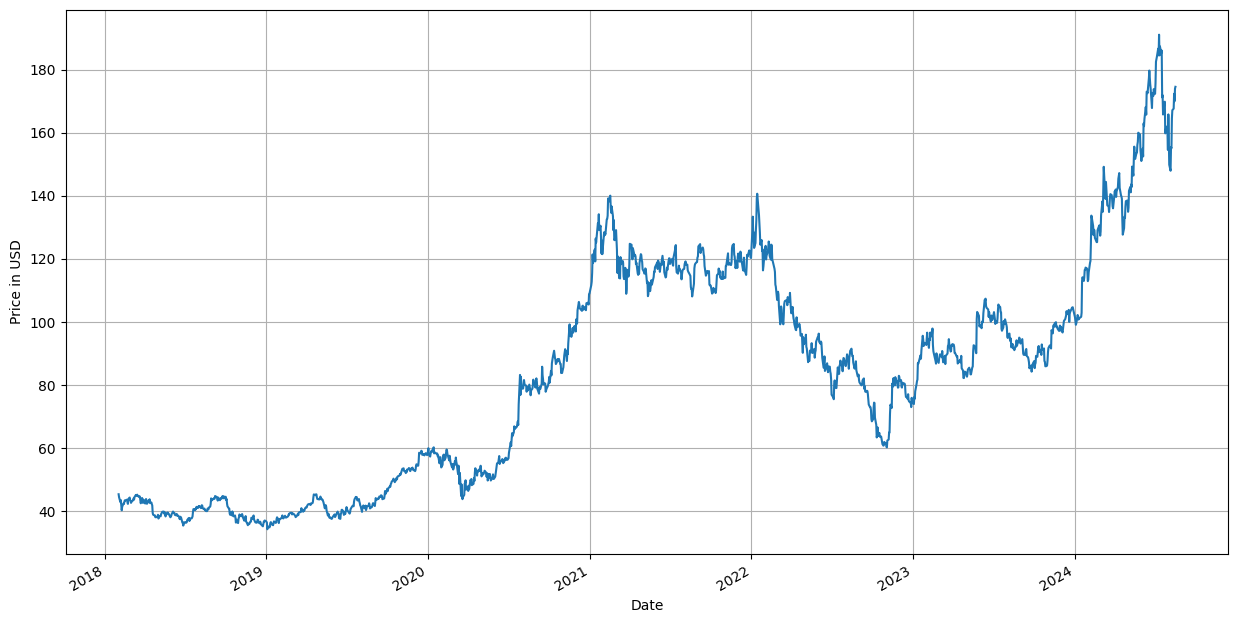

In [34]:
stock_data['Close'].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price in USD")
plt.show()

In [35]:
# create 20 days simple moving average column
stock_data['20_SMA'] = stock_data['Close'].rolling(window = 20, min_periods = 1).mean()
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,20_SMA
Date,,,,,,,
2018-02-01,45.330002,45.930000,45.299999,45.450001,38.270596,6706500,45.450001
2018-02-02,45.009998,45.320000,44.450001,44.509998,37.479092,12051800,44.980000
2018-02-05,44.049999,44.810001,42.810001,42.950001,36.165508,11748300,44.303333
2018-02-06,42.270000,43.700001,42.099998,43.590000,36.704418,13414100,44.125000
2018-02-07,42.990002,42.990002,41.880001,41.880001,35.264530,15239500,43.676000


In [36]:
# create 50 days simple moving average column
stock_data['50_SMA'] = stock_data['Close'].rolling(window = 50, min_periods = 1).mean()
stock_data = stock_data[['Close', '20_SMA', '50_SMA']]
stock_data.head()

,Close,20_SMA,50_SMA
Date,,,
2018-02-01,45.450001,45.450001,45.450001
2018-02-02,44.509998,44.980000,44.980000
2018-02-05,42.950001,44.303333,44.303333
2018-02-06,43.590000,44.125000,44.125000
2018-02-07,41.880001,43.676000,43.676000


In [37]:
stock_data['Signal'] = 0.0
stock_data['Signal'] = np.where(stock_data['20_SMA'] > stock_data['50_SMA'], 1.0, 0.0)

stock_data['Position'] = stock_data['Signal'].diff()
# display first few rows
stock_data.head()

/var/folders/1n/xgz_qd31509d_fgnnlx940fc0000gn/T/ipykernel_15015/1441301521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Signal'] = 0.0
/var/folders/1n/xgz_qd31509d_fgnnlx940fc0000gn/T/ipykernel_15015/1441301521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Signal'] = np.where(stock_data['20_SMA'] > stock_data['50_SMA'], 1.0, 0.0)
/var/folders/1n/xgz_qd31509d_fgnnlx940fc0000gn/T/ipykernel_15015/1441301521.py:4: SettingWithCopyWarning: 
A value is trying to be set on a co

,Close,20_SMA,50_SMA,Signal,Position
Date,,,,,
2018-02-01,45.450001,45.450001,45.450001,0.0,NaN
2018-02-02,44.509998,44.980000,44.980000,0.0,0.0
2018-02-05,42.950001,44.303333,44.303333,0.0,0.0
2018-02-06,43.590000,44.125000,44.125000,0.0,0.0
2018-02-07,41.880001,43.676000,43.676000,0.0,0.0


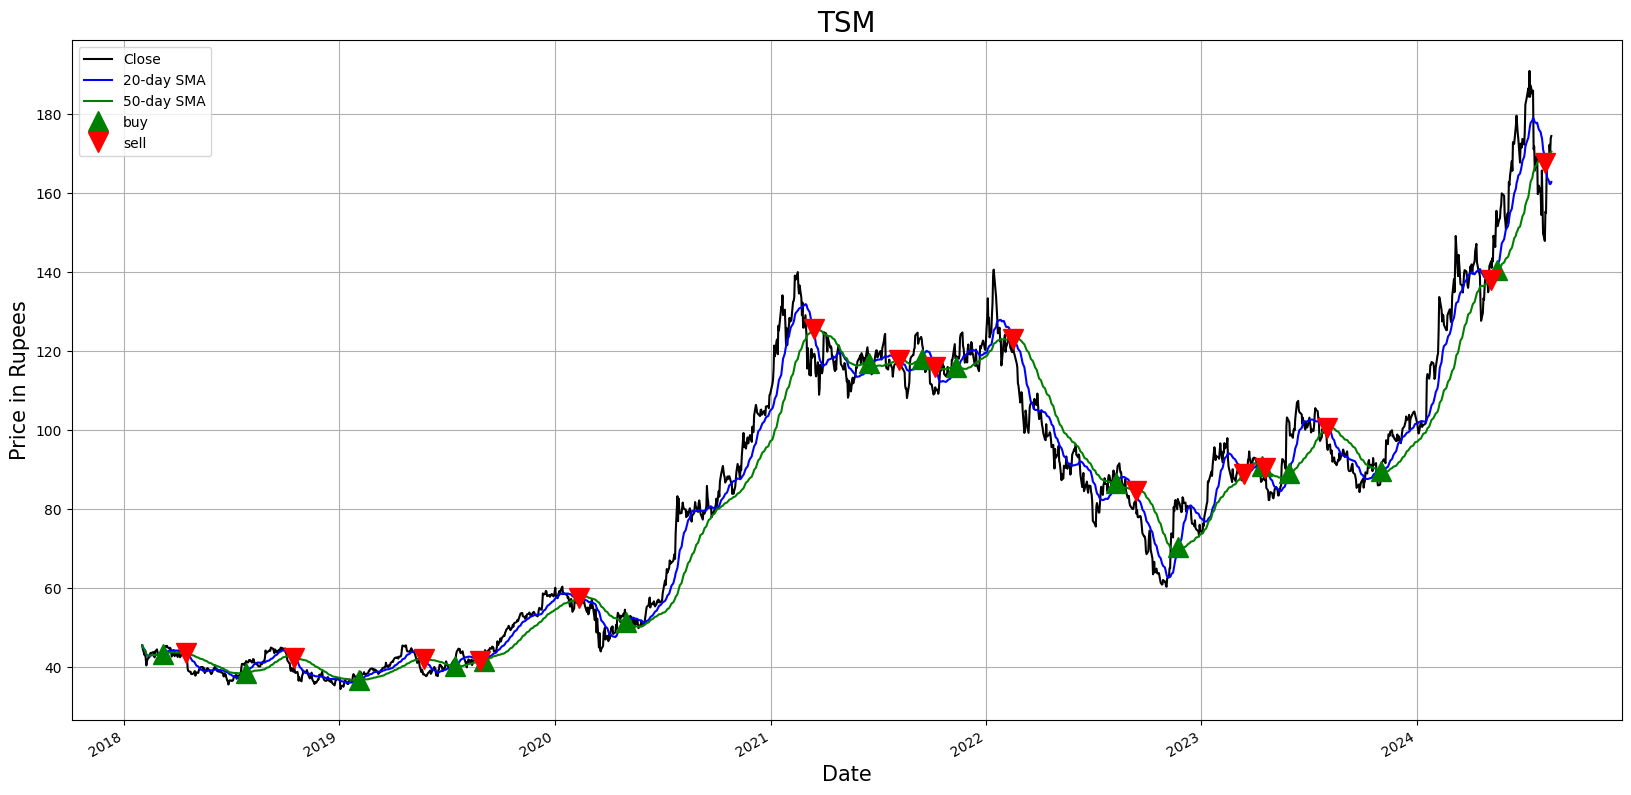

In [38]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
stock_data['Close'].plot(color = 'k', label= 'Close') 
stock_data['20_SMA'].plot(color = 'b',label = '20-day SMA') 
stock_data['50_SMA'].plot(color = 'g', label = '50-day SMA')
# plot 'buy' signals
plt.plot(stock_data[stock_data['Position'] == 1].index, 
         stock_data['20_SMA'][stock_data['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot 'sell' signals
plt.plot(stock_data[stock_data['Position'] == -1].index, 
         stock_data['20_SMA'][stock_data['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('TSM', fontsize = 20)
plt.legend()
plt.grid()
plt.show()